### Annual vs Monthly Averages

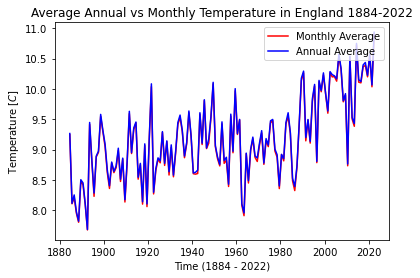

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

year = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_ann_188401-202212.nc")
month = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_mon_188401-202212.nc")

tas_array = np.array(year['tas'])
tasm_array = np.array(month['tas'])
time_array = np.array(year['time'])


temp = block_reduce(tasm_array, block_size=(12,1), func=np.mean, cval=np.mean(tasm_array))

plt.plot(time_array, temp[:,1], 'r', label='Monthly Average')
plt.plot(time_array, tas_array[:,1], 'b', label='Annual Average')
plt.legend(loc='upper right')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual vs Monthly Temperature in England 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.show()

### Annual Average from Months starting from December 

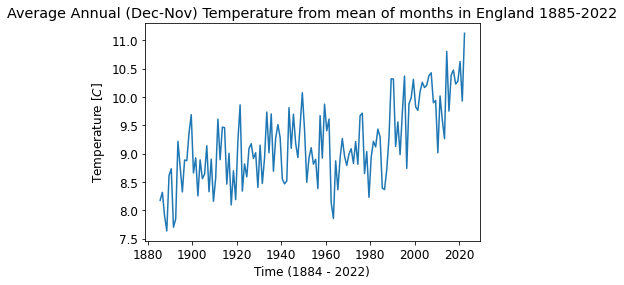

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

year = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_ann_188401-202212.nc")
month = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_mon_188401-202212.nc")

tasm_array = np.array(month['tas'])
time_array = np.array(year['time'])
timem_array = np.array(month['time'])

tasm_array = tasm_array[:,1]
temp = block_reduce(tasm_array[11:1667], block_size=(12), func=np.mean, cval=np.mean(tasm_array[11:1667]))


plt.plot(time_array[1:], temp)
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual (Dec-Nov) Temperature from mean of months in England 1885-2022')
plt.rcParams.update({'font.size': 12})

### December year vs January year

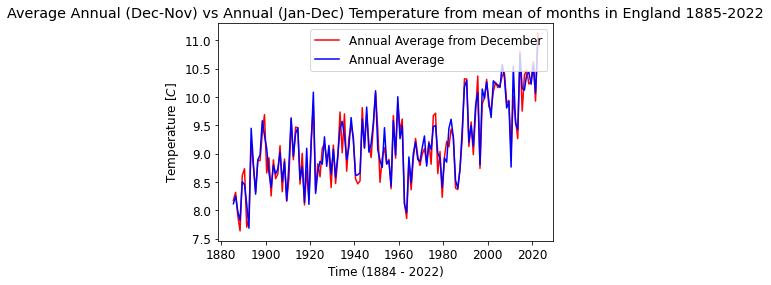

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

year = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_ann_188401-202212.nc")
month = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_mon_188401-202212.nc")

tasm_array = np.array(month['tas'])
tasy_array = np.array(year['tas'])
timey_array = np.array(year['time'])
timem_array = np.array(month['time'])

tasy_array = tasy_array[:,1]
tasm_array = tasm_array[:,1]
temp = block_reduce(tasm_array[11:1667], block_size=(12), func=np.mean, cval=np.mean(tasm_array[11:1667]))


plt.plot(timey_array[1:], temp, 'r', label='Annual Average from December')
plt.plot(timey_array[1:], tasy_array[1:], 'b', label='Annual Average')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual (Dec-Nov) vs Annual (Jan-Dec) Temperature from mean of months in England 1885-2022')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')


### UK Temperature Map for 25 km$^2$

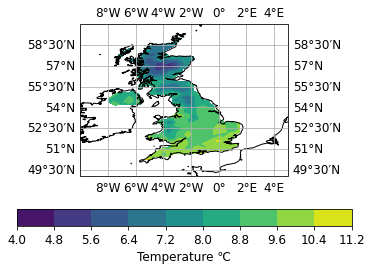

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)

temp = np.array(data['tas'])

lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

mean_temp = np.mean(temp, axis=0)

plt.figure()

# Create a Cartopy projection with the desired extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 5, 49, 60])

# Add coastlines and gridlines
ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)

# Create a contour plot for the mean temperature field
contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)

# Add a colorbar
cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature \u2103")

plt.show()